<a href="https://colab.research.google.com/github/shreeganeshasharma/ParticleSimulations/blob/main/Pure1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D1 = 1; D2 = 10
___
https://journals.aps.org/pre/supplemental/10.1103/PhysRevE.105.014604
___

#Initialization

In [1]:
#necessary libraries
import time
import math
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
np.random.seed(2131)

#Brownian motion parameters
#Time step
dt = 0.001
#Number of steps
nums = 1000
#Number of particles
nump = 100000
#Boundary between media
R1 = 0.5
#Outer reflecting boundary
R2 = 1
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 10

#Radius of the target at the center
#R = R1/100
"""Get r0 value from paper - Giacomo uses an absorbing boundary at 0"""
R = 0

#Parameters of the normal distribution
mean = 0
covar = 1

#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Random steps
Eps = np.random.normal(mean, covar, (nump, nums))
dX1s = np.sqrt(2*D1*dt)*Eps
dX2s = np.sqrt(2*D2*dt)*Eps

#nump particles starting at init
Init = np.tile(np.array([.2]), nump)

"""Initialize X[0] here - Can't do
Can initialize Y[0][:]
Initialize counts for t=0"""

#Hitting times if the target is hit
hittingTime = np.zeros(nump)

#Simulate Ito Convention

In [2]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      #Remove the particle once it hits the target
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels is presently in medium1 and travels without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is presently traveling in medium2 and travels without crossing the oter boundary
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

Streaming output truncated to the last 5000 lines.
95001
95002
95003
95004
95005
95006
95007
95008
95009
95010
95011
95012
95013
95014
95015
95016
95017
95018
95019
95020
95021
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95054
95055
95056
95057
95058
95059
95060
95061
95062
95063
95064
95065
95066
95067
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95080
95081
95082
95083
95084
95085
95086
95087
95088
95089
95090
95091
95092
95093
95094
95095
95096
95097
95098
95099
95100
95101
95102
95103
95104
95105
95106
95107
95108
95109
95110
95111
95112
95113
95114
95115
95116
95117
95118
95119
95120
95121
95122
95123
95124
95125
95126
95127
95128
95129
95130
95131
95132
95133
95134
95135
95136
95137
95138
95139
95140
95141
95142
95143
95144
95145
95146
95147
95148
95149
95150
95151
95152
95153
95154
95155
95156
95157
95158
9

#Plot

Mean First Passage Time =  92.8882131103264


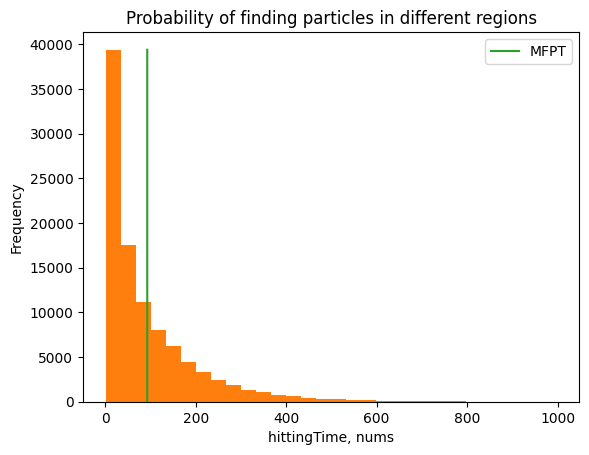

In [3]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

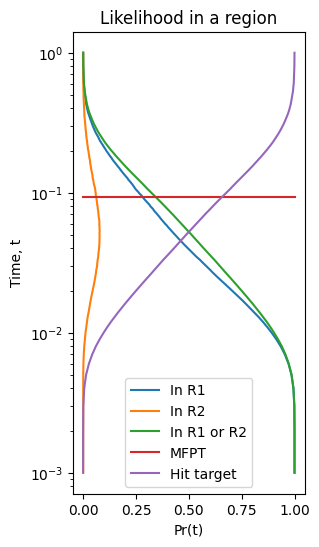

In [4]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

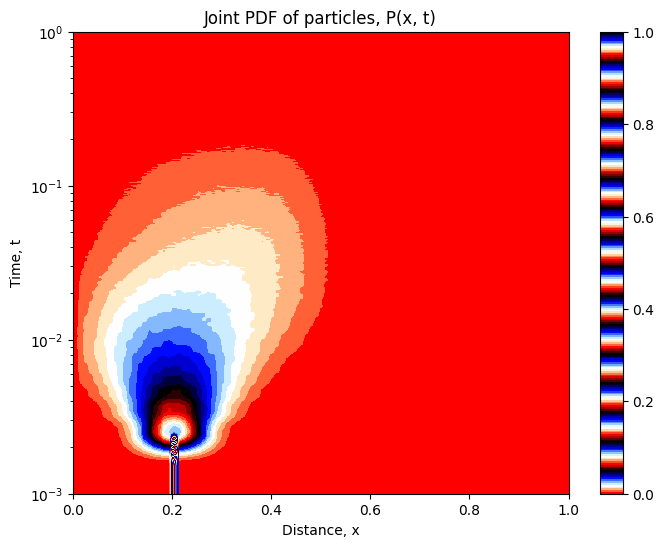

In [5]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

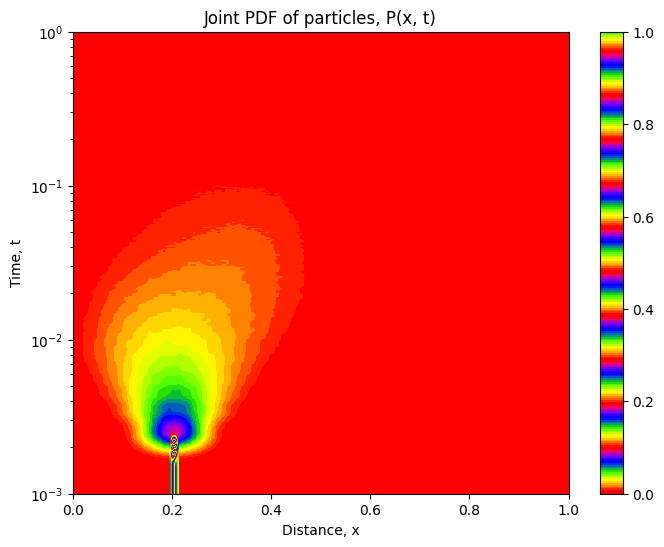

In [6]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [7]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 47.51067852973938 seconds ---


#Plot

Mean First Passage Time =  125.09114076452292


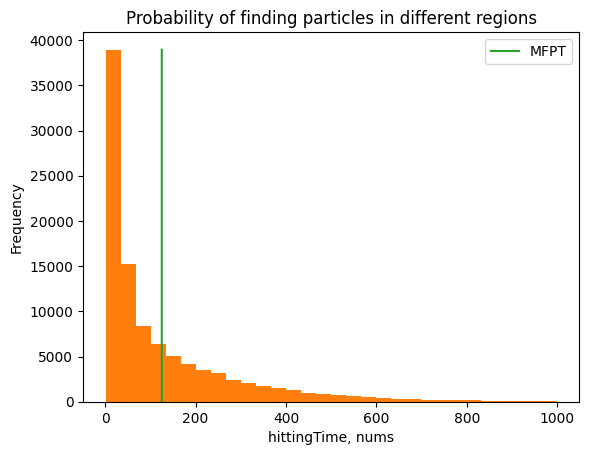

In [8]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

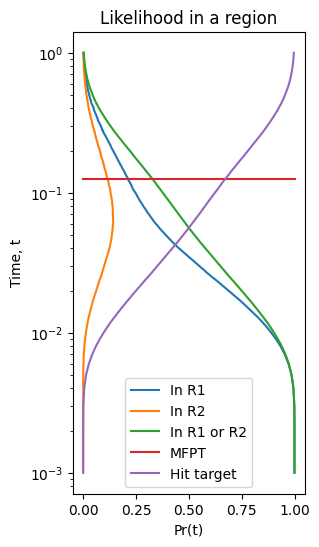

In [9]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

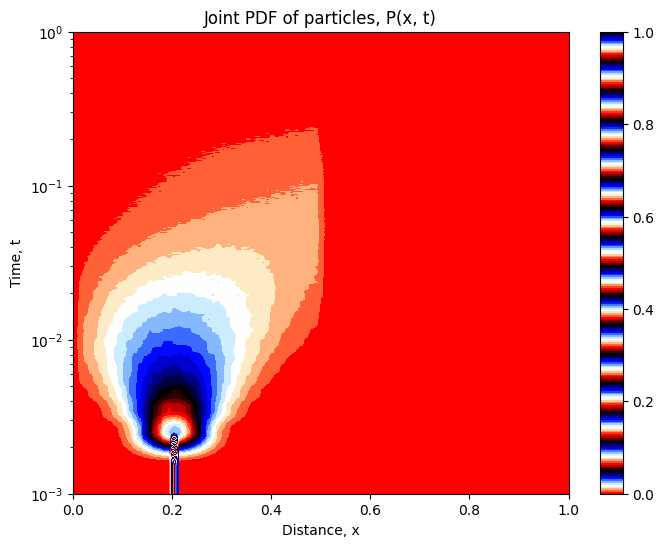

In [10]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

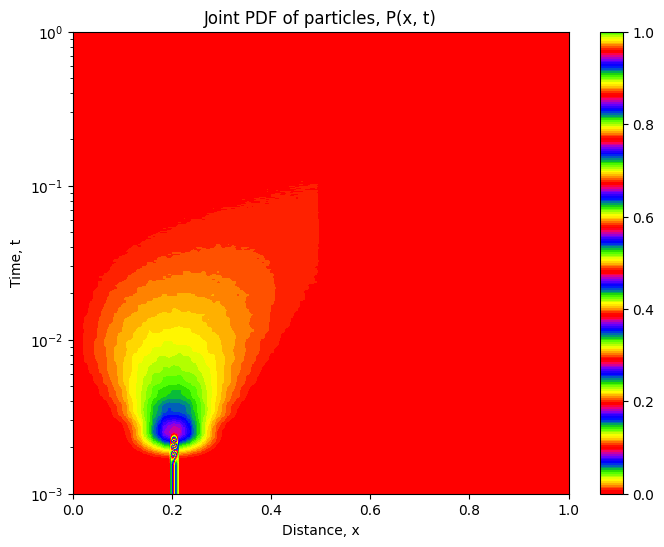

In [11]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [12]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 181.57514262199402 seconds ---


#Plot

Mean First Passage Time =  163.2483889378924


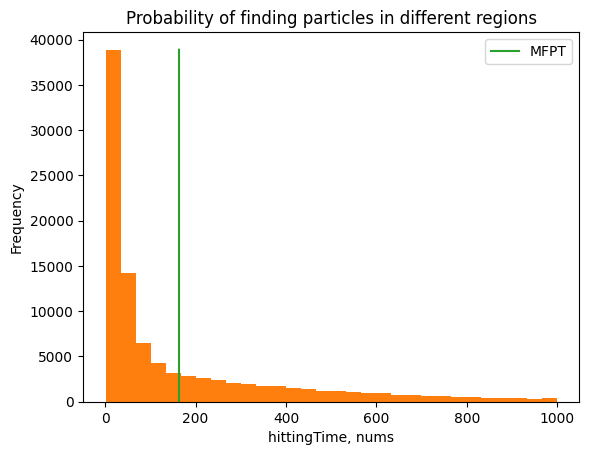

In [13]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

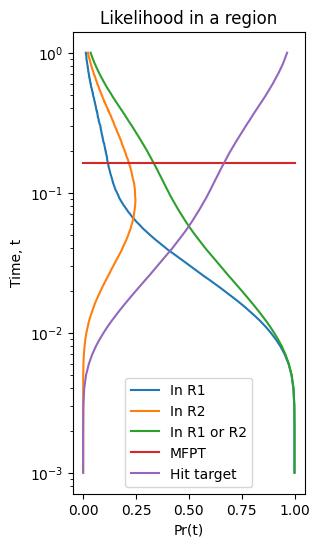

In [14]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

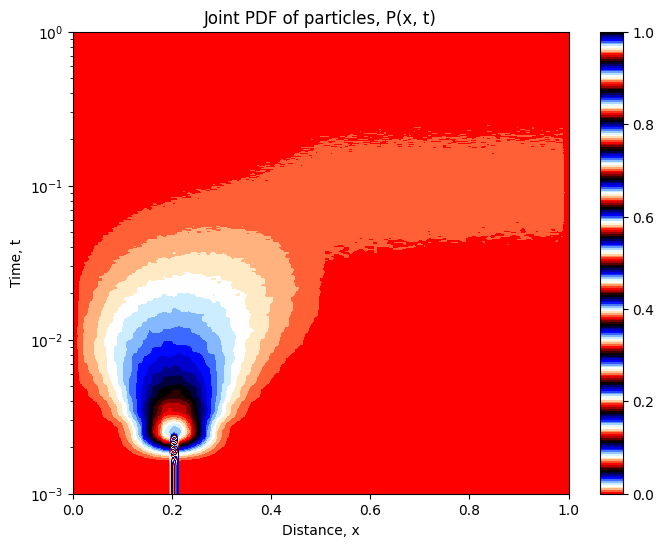

In [15]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

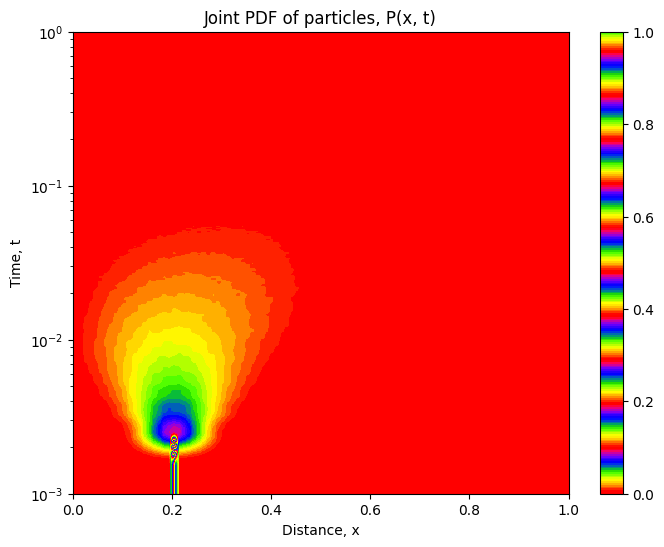

In [16]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 1.1
___
___

#Simulate Ito Convention

In [17]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 1.1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [18]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 35.07758164405823 seconds ---


#Plot

Mean First Passage Time =  92.8882131103264


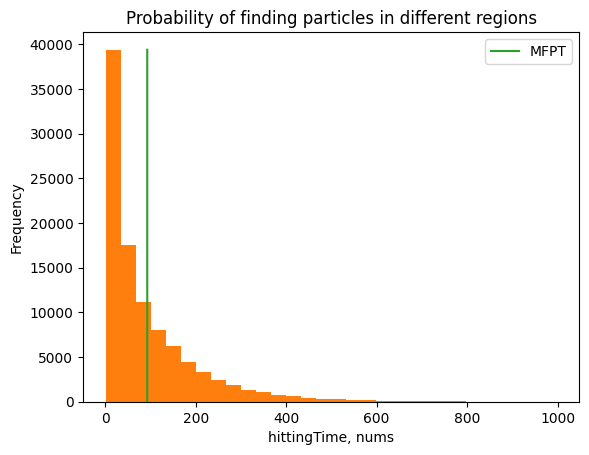

In [19]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

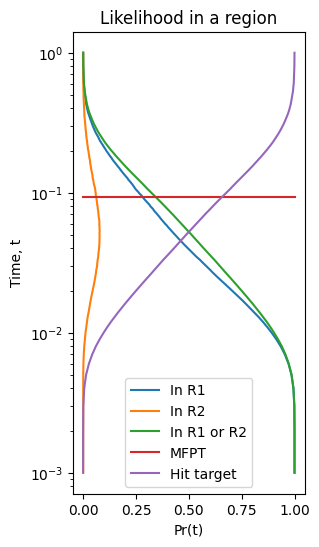

In [20]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

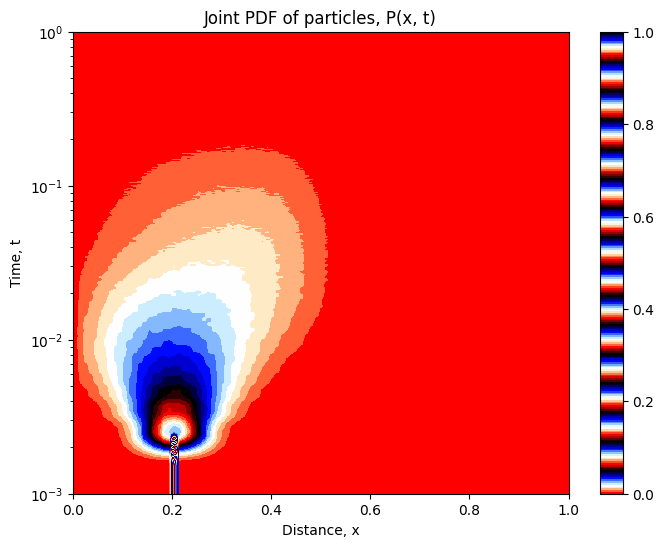

In [21]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

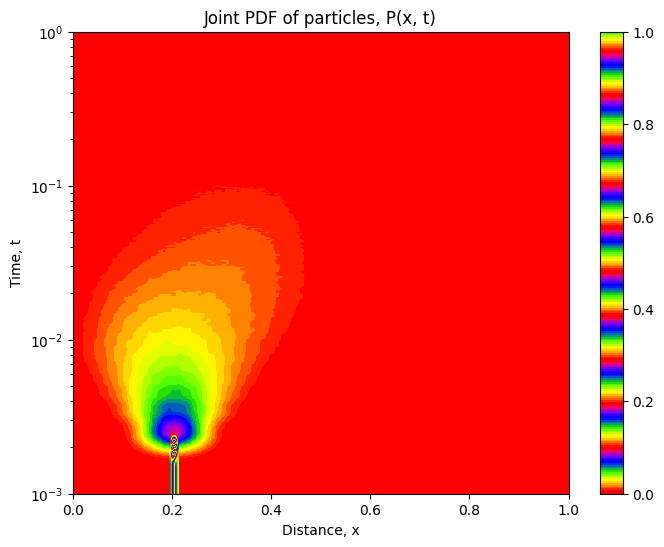

In [23]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [24]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 41.77104663848877 seconds ---


#Plot

Mean First Passage Time =  111.5412583212373


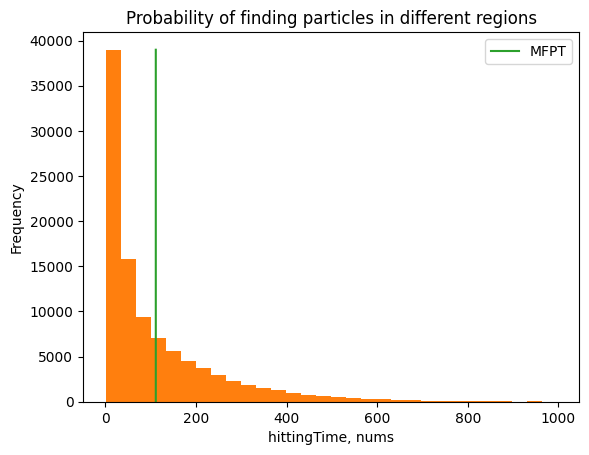

In [25]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

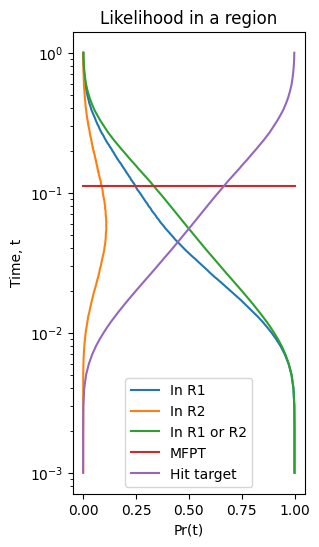

In [26]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

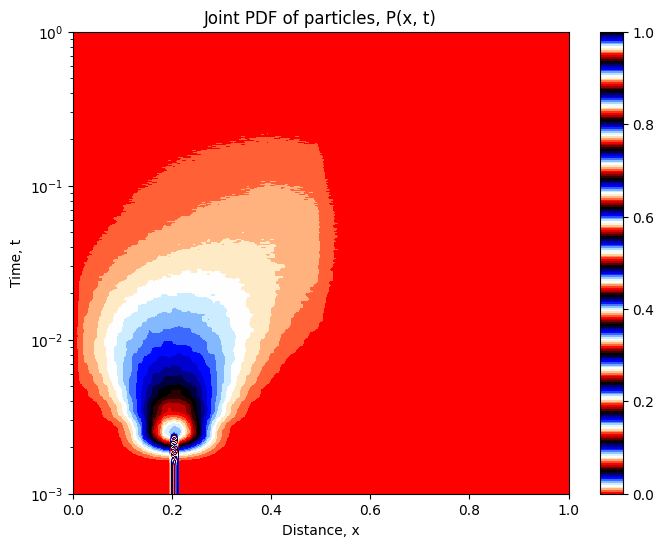

In [27]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

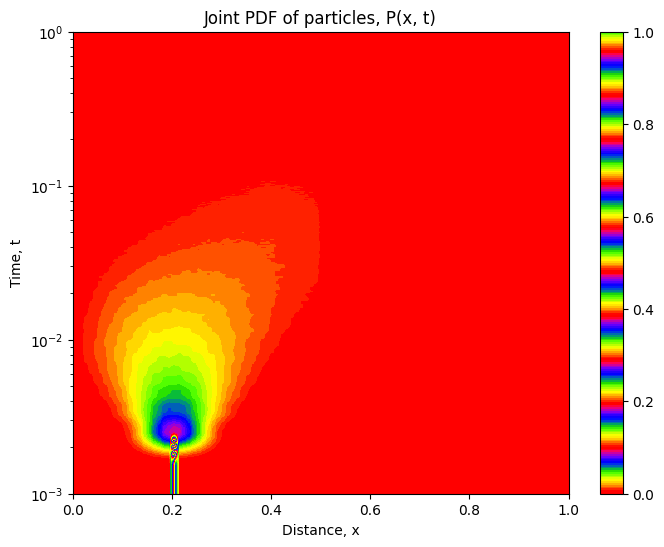

In [28]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [29]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 84.74708676338196 seconds ---


#Plot

Mean First Passage Time =  112.84727436552035


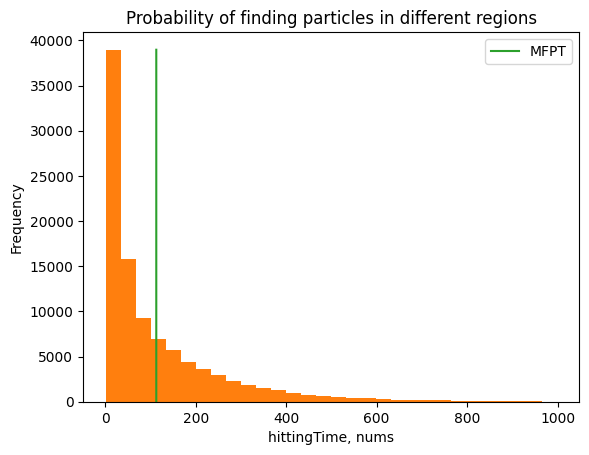

In [30]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

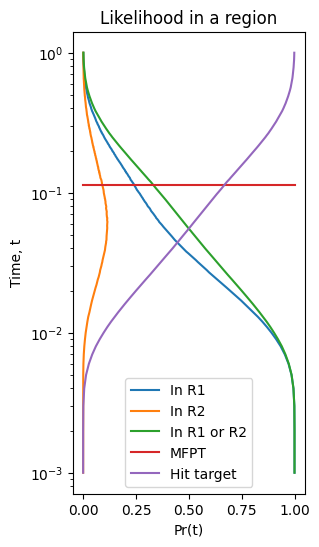

In [31]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

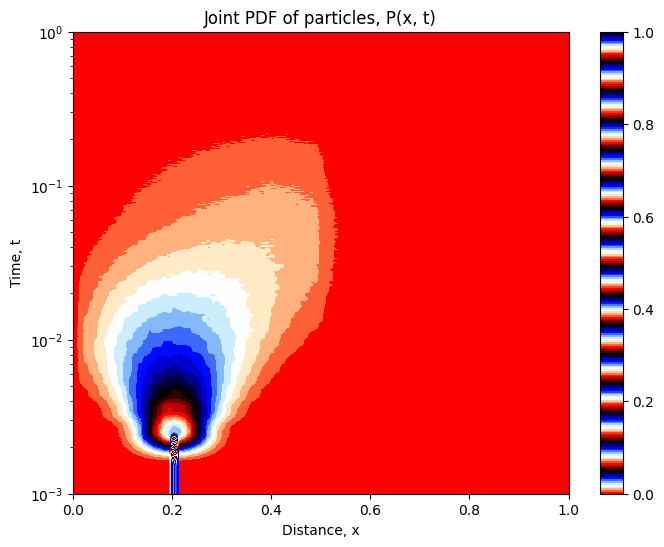

In [32]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

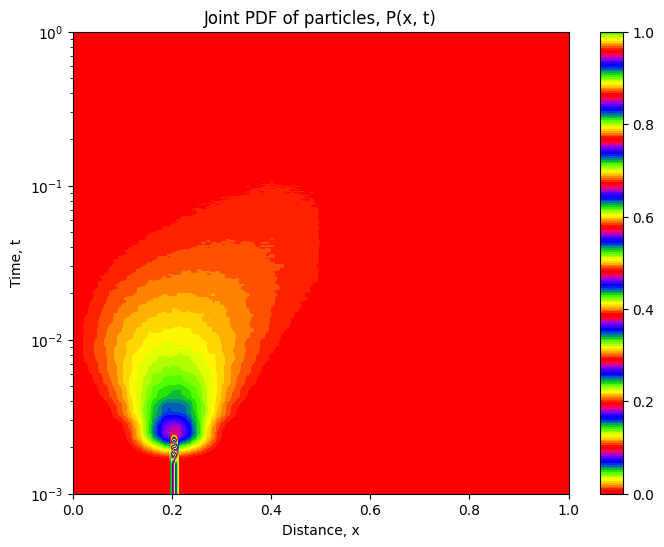

In [33]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1; D2 = 1
___
___

#Simulate Ito Convention

In [34]:
#Diffusivity of inner medium
D1 = 1
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [35]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 38.13024091720581 seconds ---


#Plot

Mean First Passage Time =  92.8882131103264


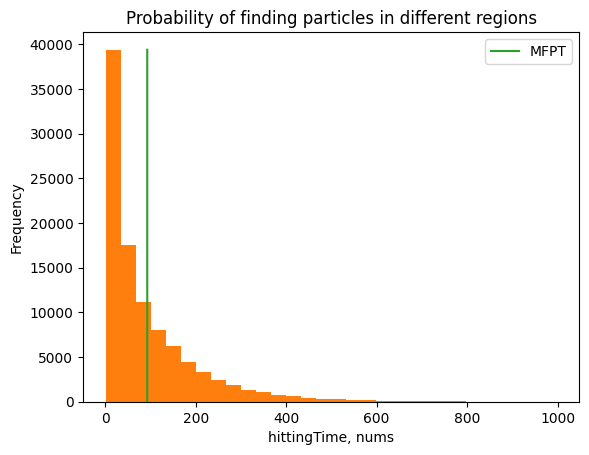

In [36]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

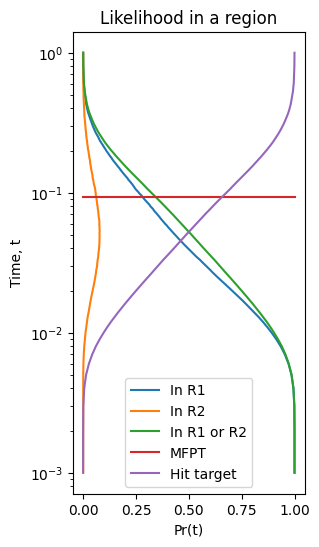

In [37]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

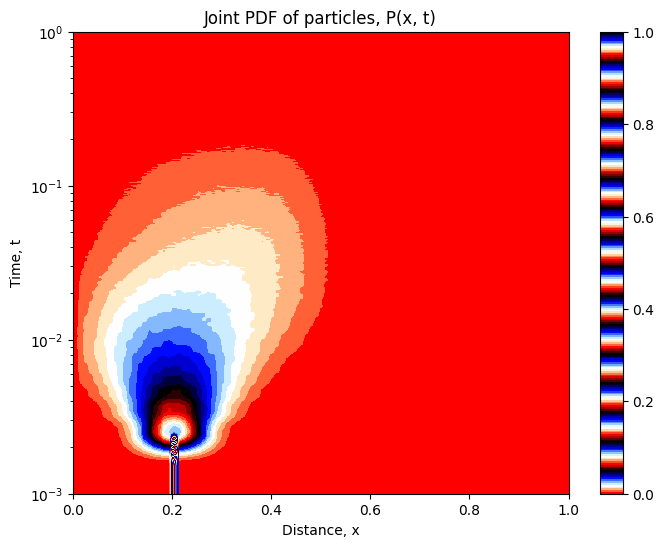

In [38]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

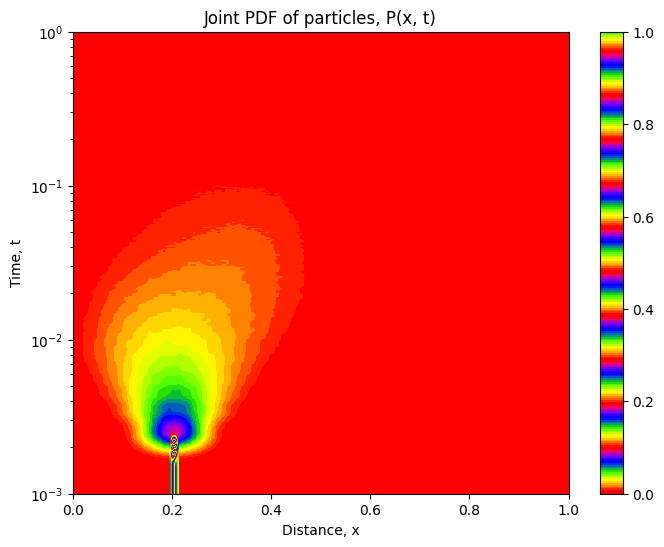

In [39]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [40]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 41.07469153404236 seconds ---


#Plot

Mean First Passage Time =  110.42786652253983


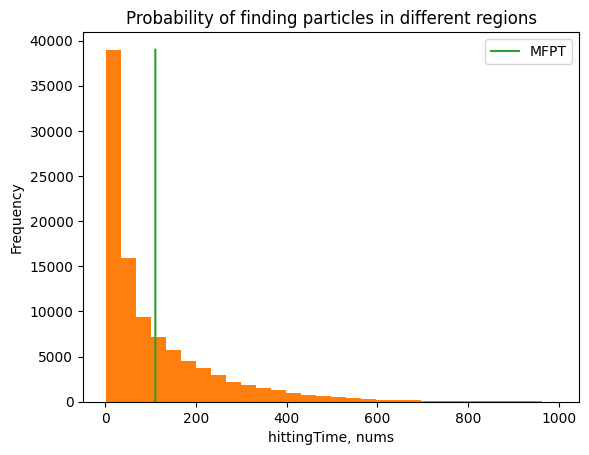

In [41]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

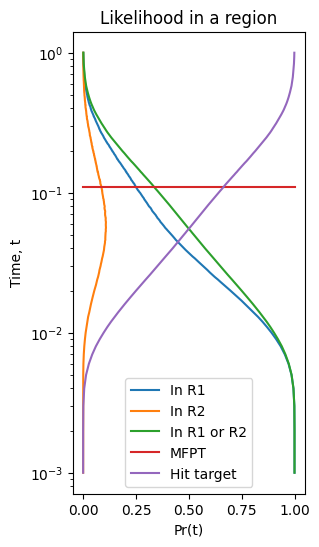

In [42]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

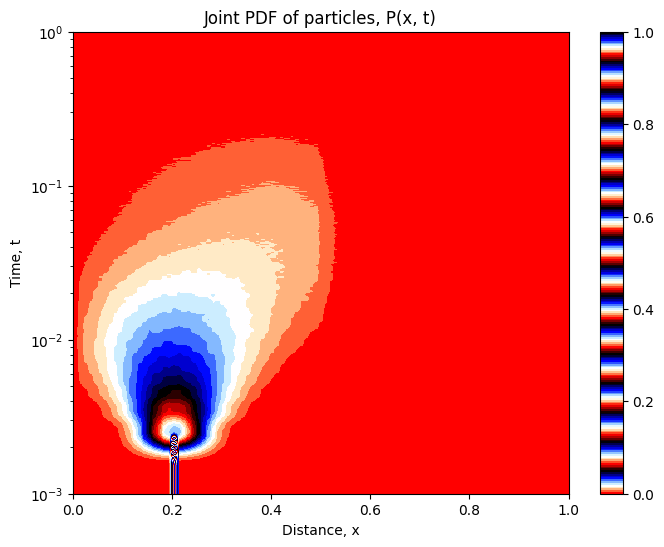

In [43]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

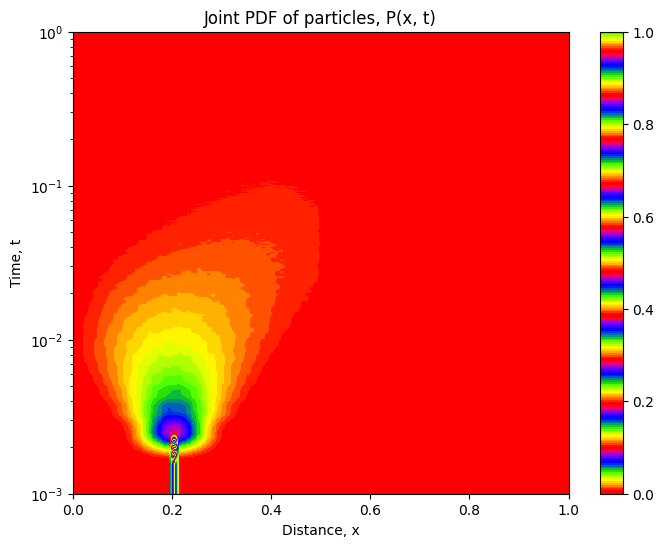

In [44]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [45]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 78.86638832092285 seconds ---


#Plot

Mean First Passage Time =  110.42786652253983


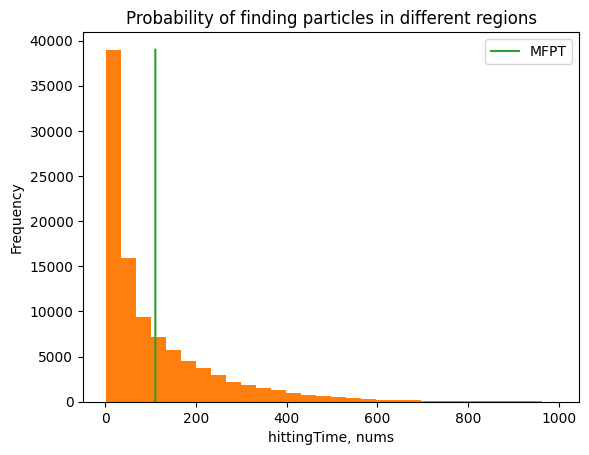

In [46]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

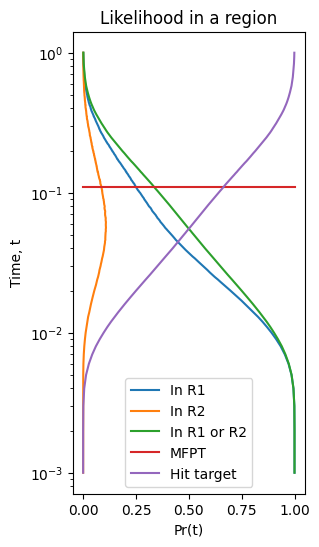

In [47]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

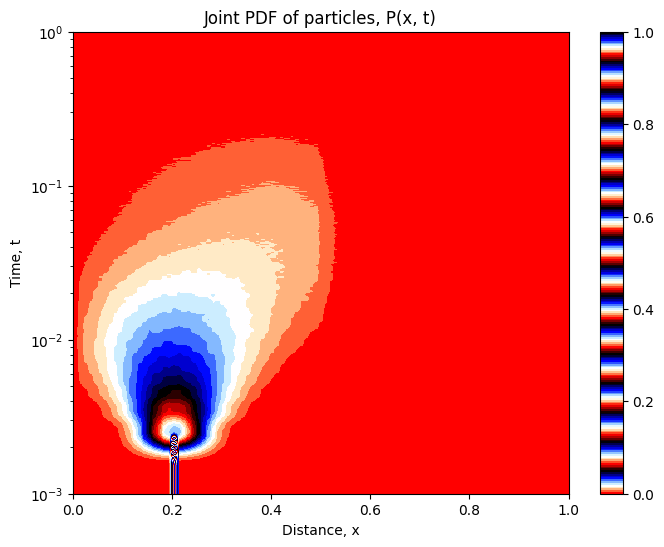

In [48]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

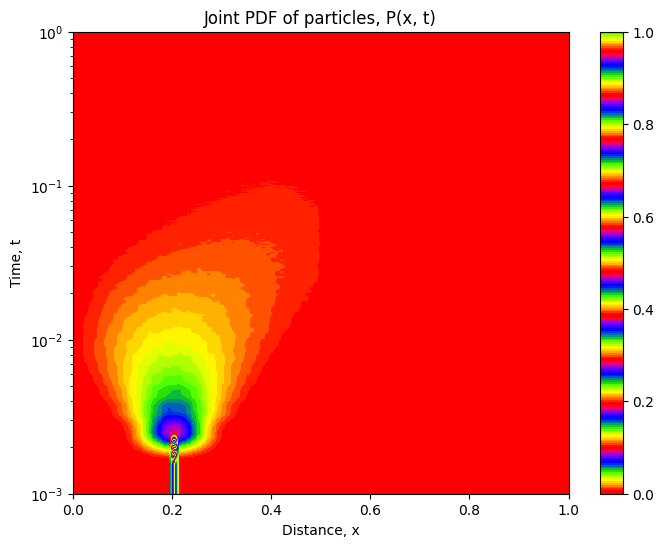

In [49]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 1.1; D2 = 1
___
___

#Simulate Ito Convention

In [50]:
#Diffusivity of inner medium
D1 = 1.1
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [51]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 45.24405336380005 seconds ---


#Plot

Mean First Passage Time =  92.8882131103264


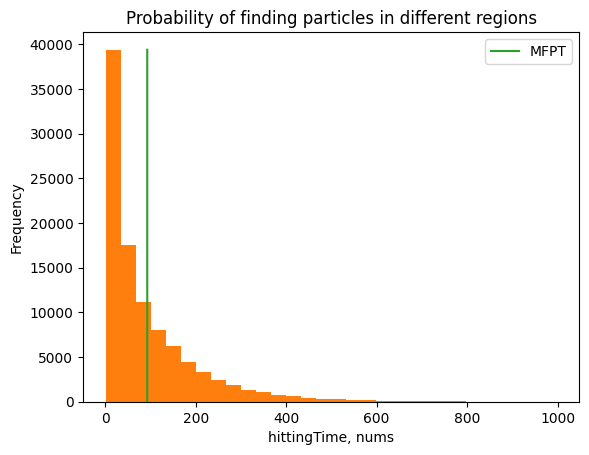

In [52]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

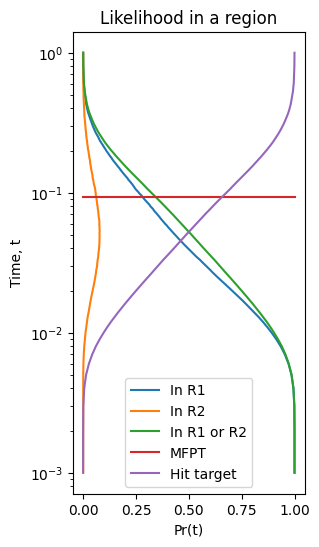

In [53]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

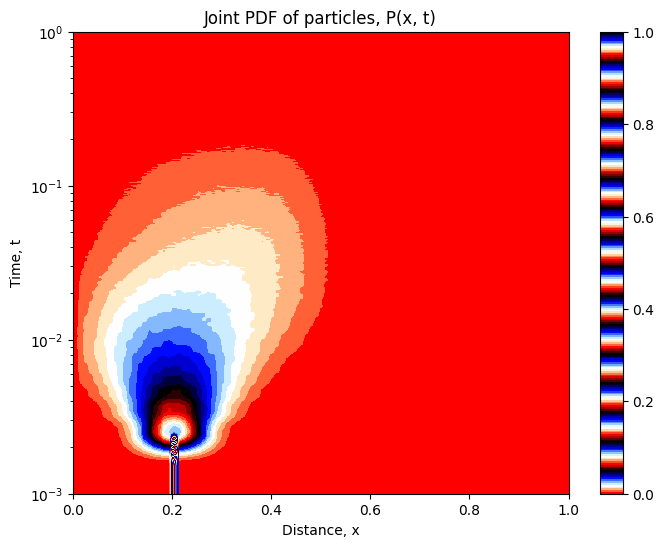

In [54]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

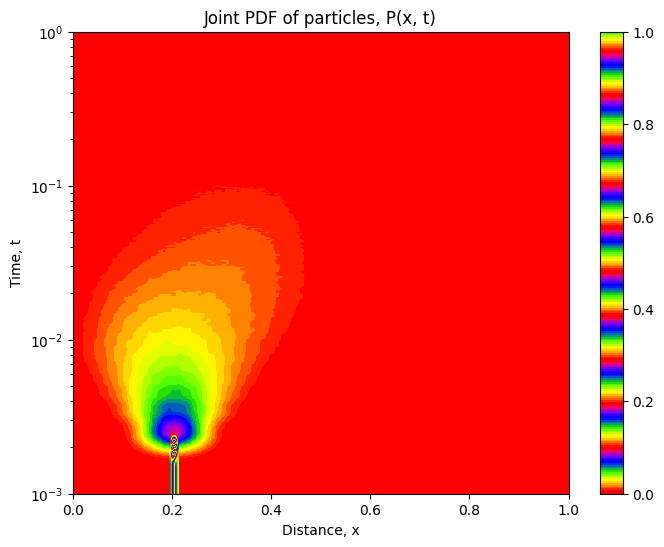

In [55]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [56]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 40.28367757797241 seconds ---


#Plot

Mean First Passage Time =  109.35947633917847


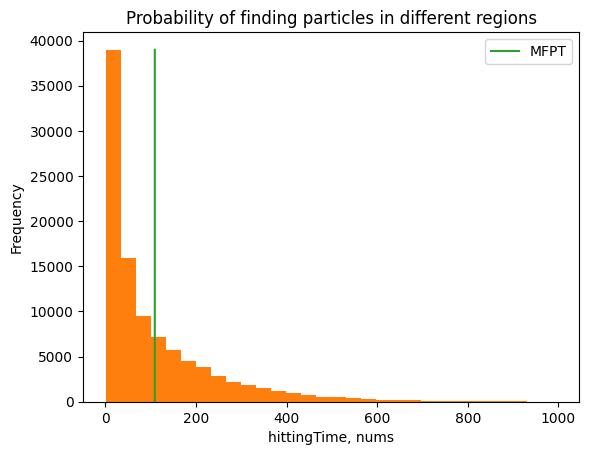

In [57]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

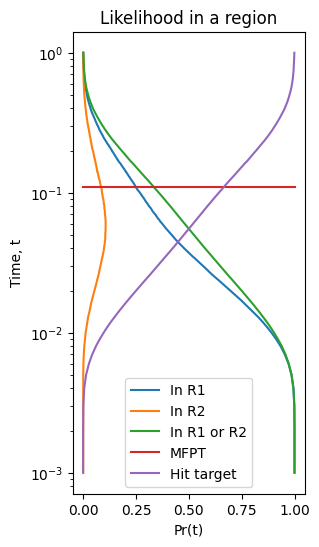

In [58]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

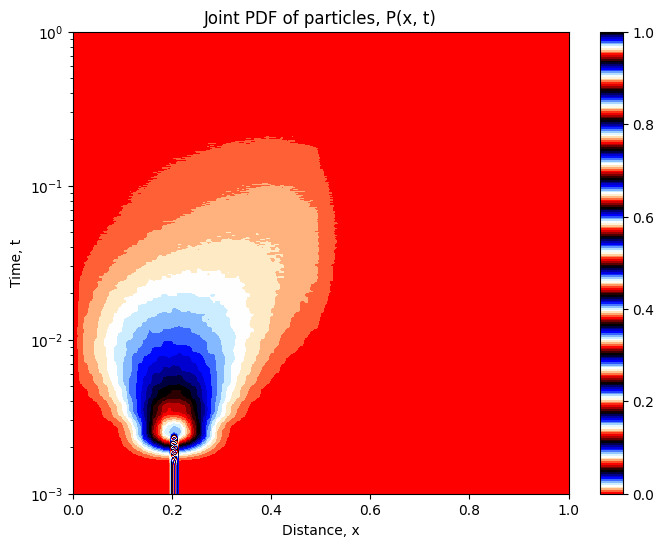

In [59]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

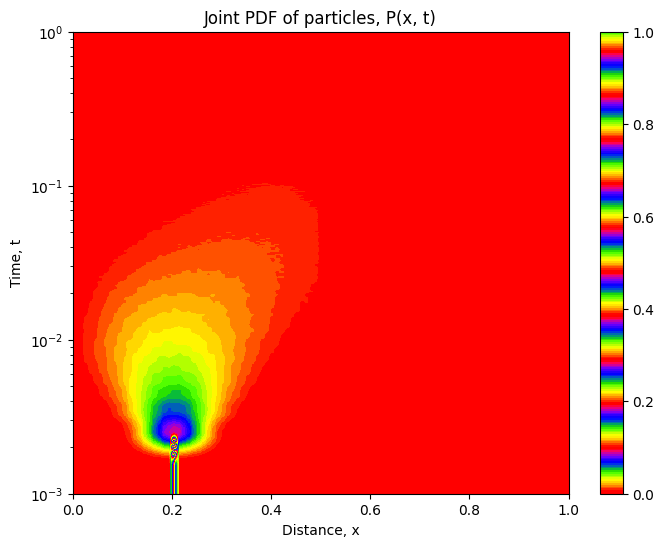

In [60]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [61]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 74.83171129226685 seconds ---


#Plot

Mean First Passage Time =  108.70516528718836


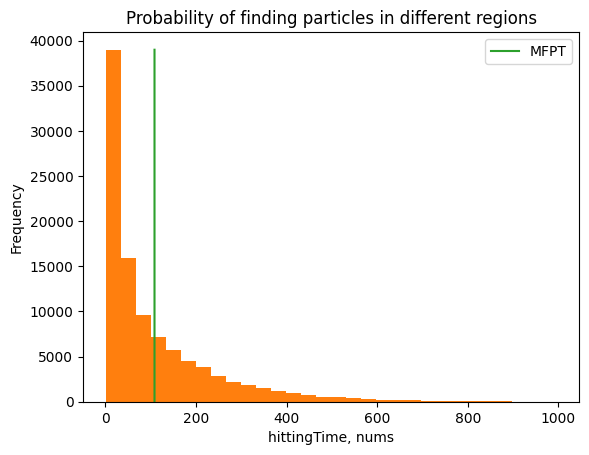

In [62]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

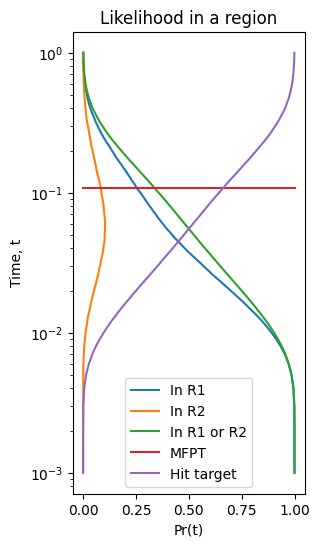

In [63]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

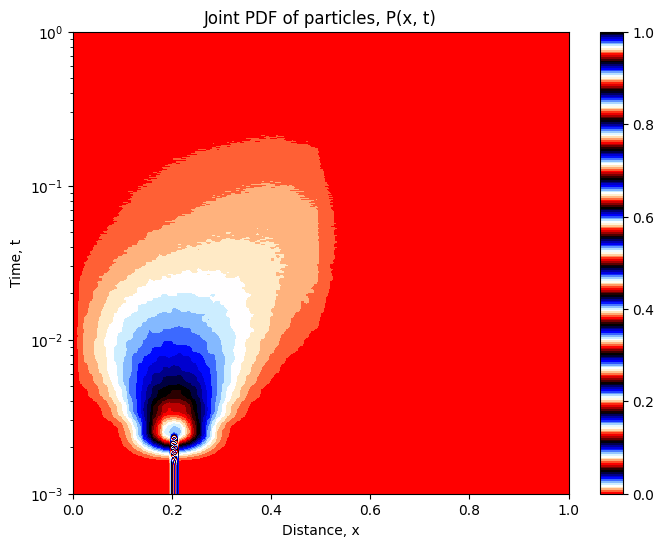

In [64]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

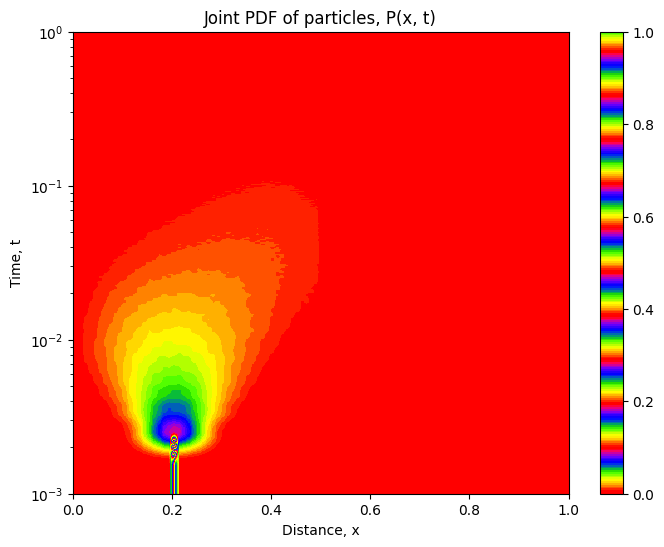

In [65]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 10; D2 = 1
___
___

#Simulate Ito Convention

In [66]:
#Diffusivity of inner medium
D1 = 10
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [67]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 36.71301627159119 seconds ---


#Plot

Mean First Passage Time =  92.8882131103264


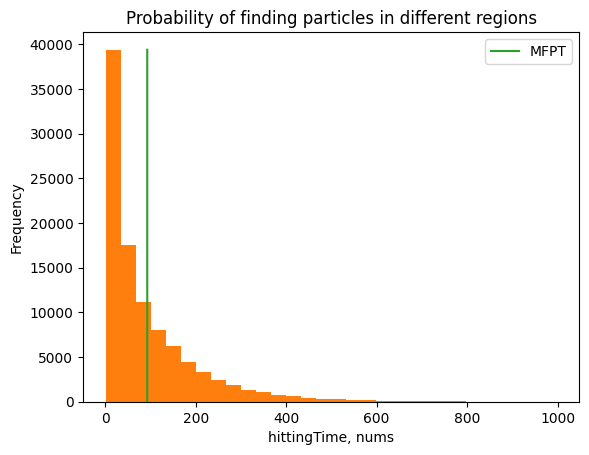

In [68]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

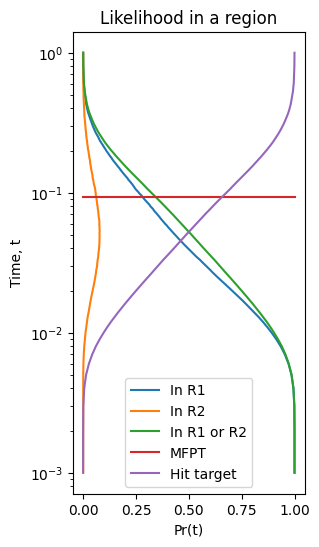

In [69]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

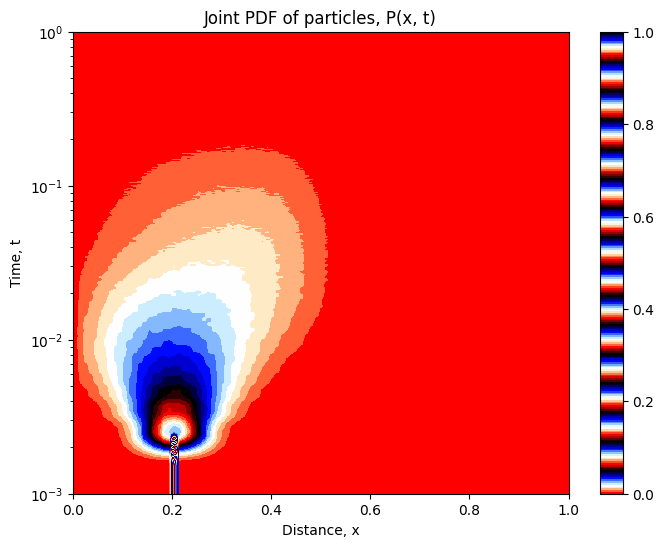

In [70]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

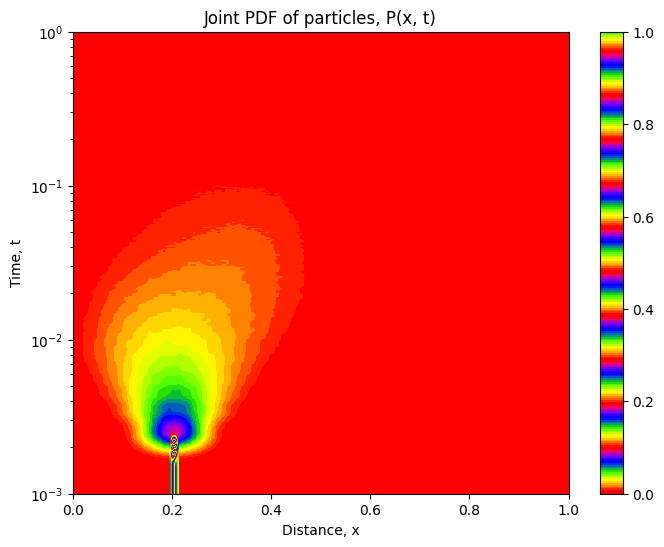

In [71]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [72]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 37.43653416633606 seconds ---


#Plot

Mean First Passage Time =  79.73200510172595


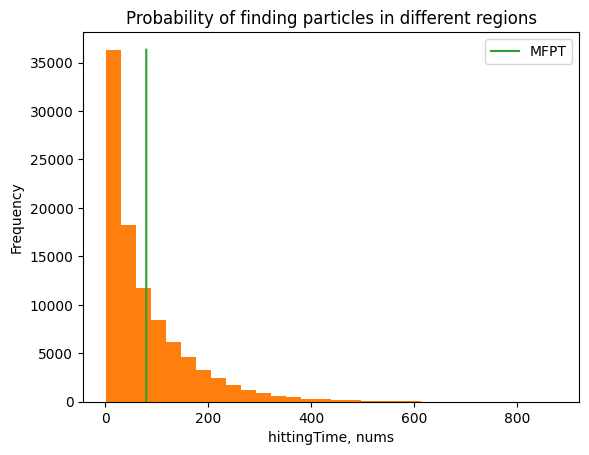

In [73]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

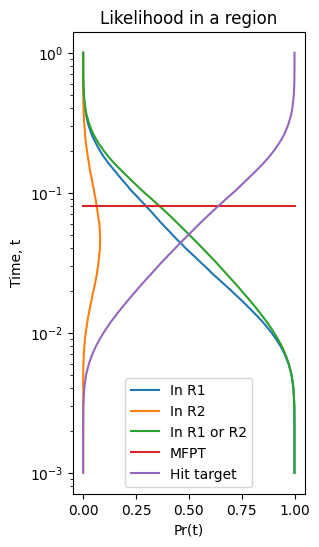

In [74]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

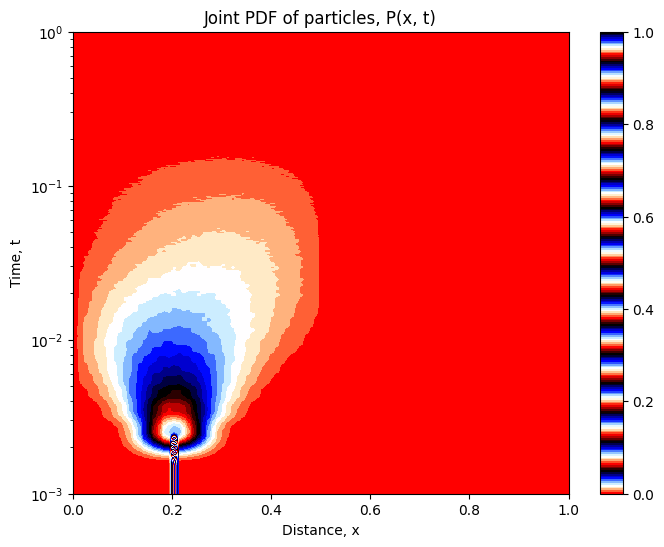

In [75]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

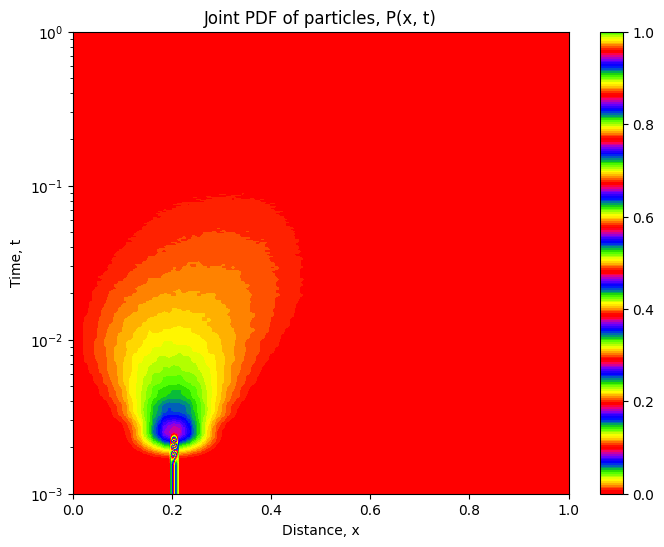

In [76]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [77]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 56.2481734752655 seconds ---


#Plot

Mean First Passage Time =  85.83076719952875


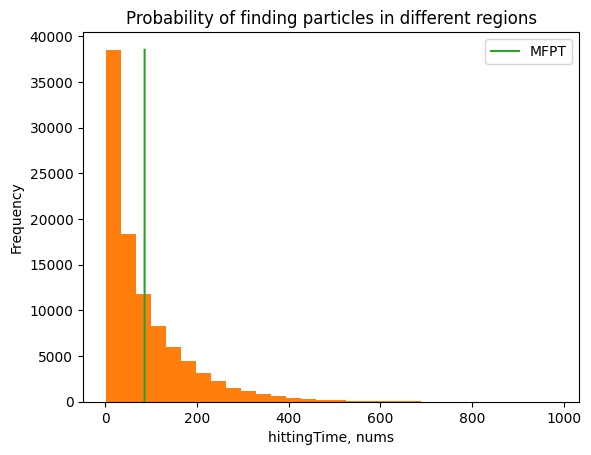

In [78]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

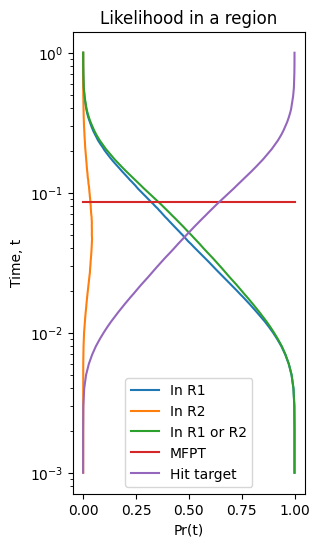

In [79]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

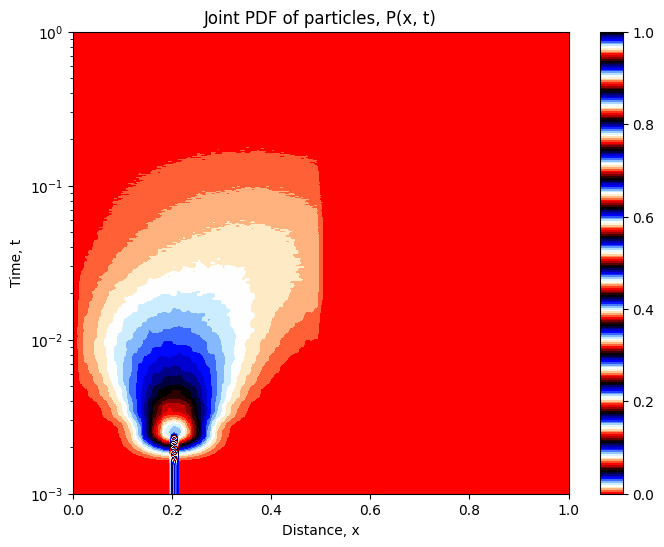

In [80]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

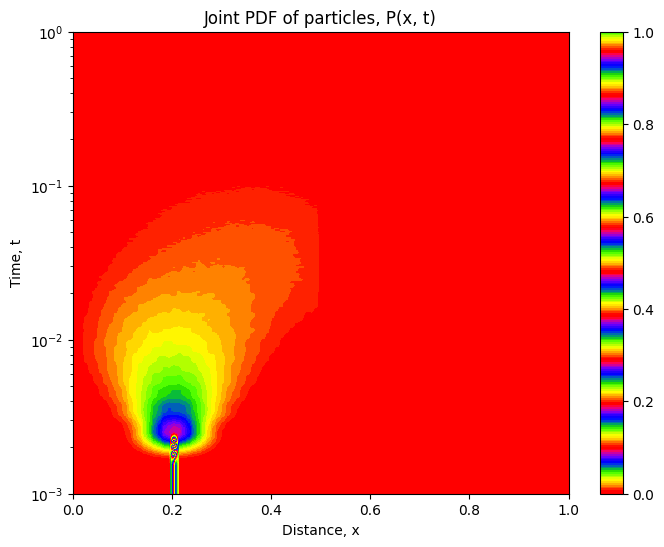

In [81]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#D1 = 100; D2 = 1
___
___

#Simulate Ito Convention

In [82]:
#Diffusivity of inner medium
D1 = 100
#Diffusivity of outer medium
D2 = 1

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

In [83]:
start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle hits the target
    if R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #X[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

    #Particle travels in medium1, without hitting the target
    elif R < X[j - 1] < R1 and R < X[j - 1] + dX1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 36.39142632484436 seconds ---


#Plot

Mean First Passage Time =  92.8882131103264


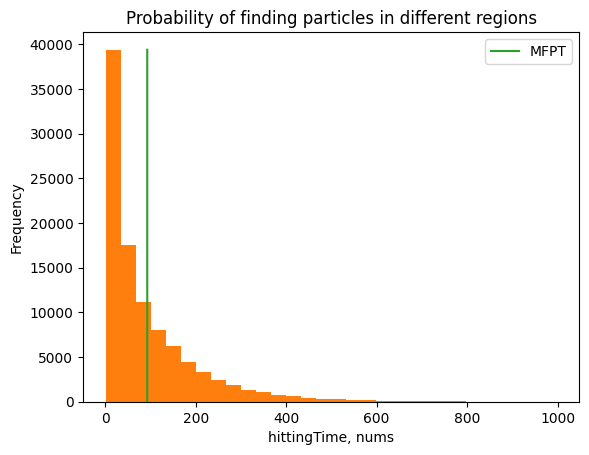

In [84]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

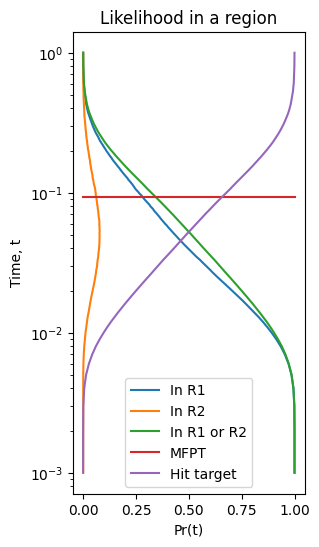

In [85]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")

plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Ito_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

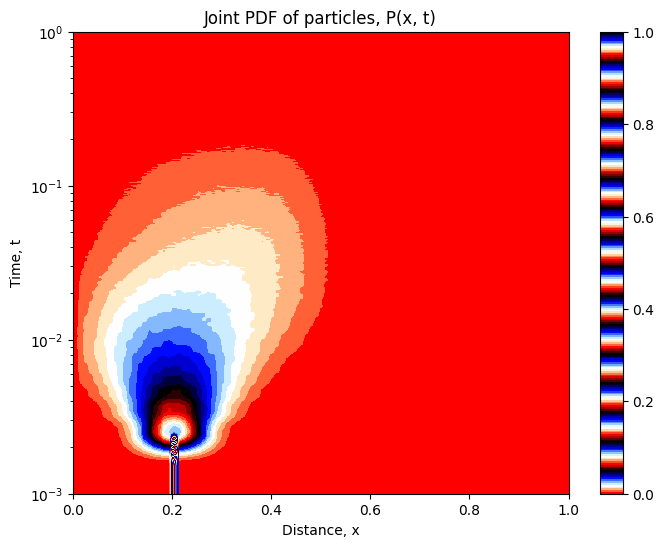

In [86]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_flag.png')

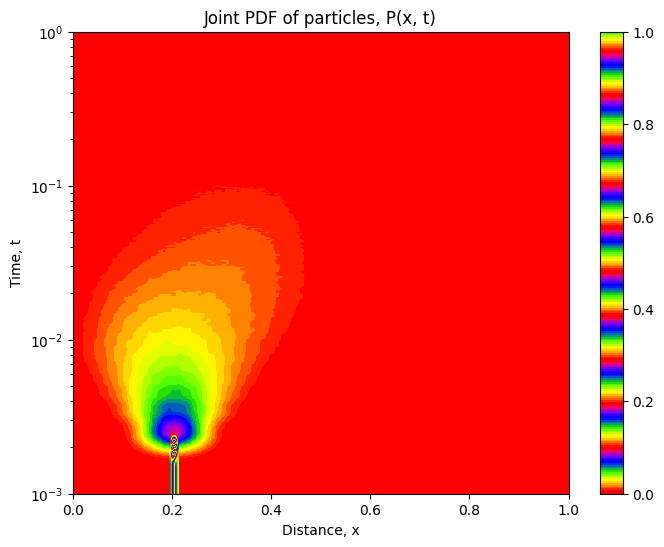

In [87]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Ito_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Stratonovich Convention

In [88]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])


start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random positio outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
      dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
      #Particle diffuses, increment by motion in D2
      X[j] = R1 + np.sqrt(2*D2*dt2)*dRand

    #Particle diffuses from D2 to D1
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
      dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
      #Particle diffuses, increment by motion in D1
      X[j] = R1 + np.sqrt(2*D1*dt1)*dRand

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 65.56956028938293 seconds ---


#Plot

Mean First Passage Time =  54.06677053193857


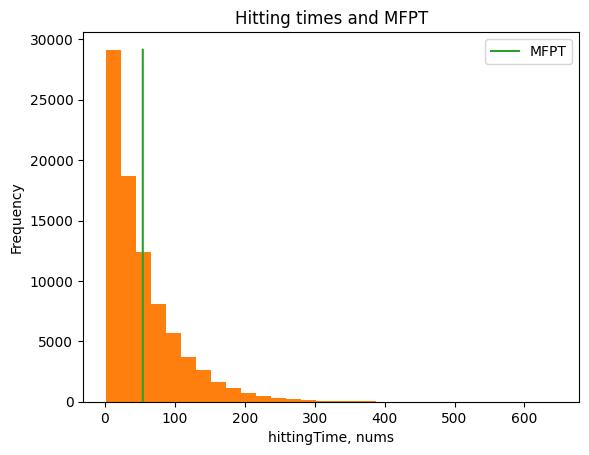

In [89]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()

plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

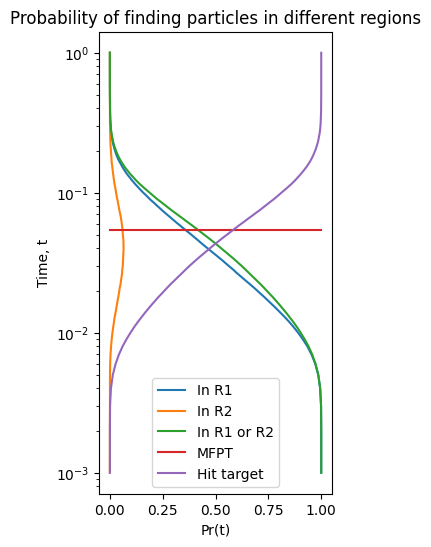

In [90]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Str_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

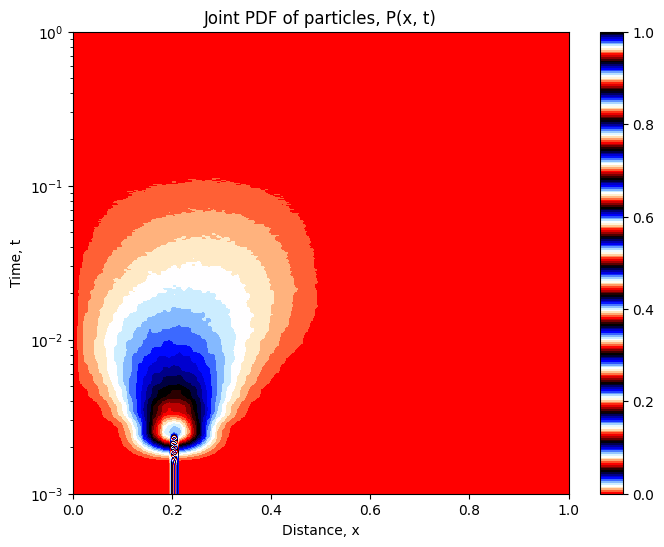

In [91]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_flag.png')

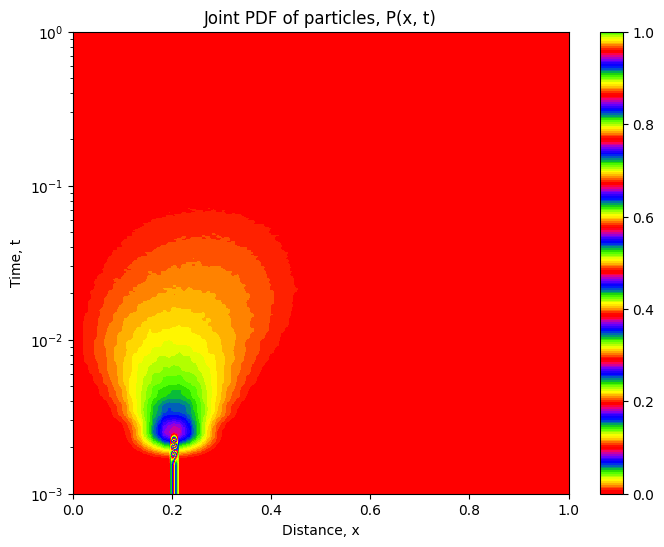

In [92]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Str_{nump}_{nums}_{D1}_{D2}_prism.png')

#Simulate Isothermal Convention

In [93]:
#Hitting times if the target is hit
hittingTime = np.zeros(nump)
#Trajectory of a particle
X = np.zeros(nums)
#Trajectories of all particles
Y = np.zeros([nums, nump])

start_time = time.time()
for i in range(nump):
  #Initialize - The particle starts at a random position outside the target
  X[0] = Init[i]

  #Find particle trajectories
  for j in range(1, nums):
    #Random increment in the position
    dRand = Eps[i, j]
    #Increment if particle is in medium1
    dX1 = dX1s[i, j]
    #Increment if particle is in medium2
    dX2 = dX2s[i, j]

    #Particle travels in medium1, without hitting the target
    if R < X[j - 1] < R1 and R < X[j - 1] + dX1 < R1:
      X[j] = X[j - 1] + dX1

    #Particle is traveling in medium2
    elif R1 < X[j - 1] < R2 and R1 < X[j - 1] + dX2 < R2:
      X[j] = X[j - 1] + dX2

    #Particle is reflected by the outer ball when its next step crosses the bound R2
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 > R2:
      X[j] = 2*R2 - X[j - 1] - dX2

    #Particle diffuses from D1 to D2 with a one sided reflection coefficient
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 > R1:
      if bernoulli.rvs(min(1, math.sqrt(D2/D1))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt1 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D1)))**2
        dt2 = (np.sqrt(dt) - np.sqrt(dt1))**2
        #Particle diffuses, increment by motion in D2
        X[j] = R1 + np.sqrt(2*D2*dt2)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX1

    #Particle diffuses from D2 to D1 with a one sided reflection coefficient
    elif R1 < X[j - 1] < R2 and X[j - 1] + dX2 < R1:
      if bernoulli.rvs(min(1, math.sqrt(D1/D2))):
        #Diffuse with time-splitting, if the random variable generated is 1
        #Residence times in each medium
        dt2 = ((R1 - X[j-1])/(dRand*np.sqrt(2*D2)))**2
        dt1 = (np.sqrt(dt) - np.sqrt(dt2))**2
        #Particle diffuses, increment by motion in D1
        X[j] = R1 + np.sqrt(2*D1*dt1)*dRand
      else:
        #Reflect, if the random variable generated is 0
        X[j] = 2*R1 - X[j - 1] - dX2

    #Particle hits the target
    elif R < X[j - 1] < R1 and X[j - 1] + dX1 < R:
      #X[j] = X[j - 1] + dX1
      #[j+1:] = X[j - 1] + dX1
      X[j] = -1
      X[j+1:] = -1
      hittingTime[i] = j
      break

  #Save the particle's trajectory
  Y[:, i] = X
  #print(i)

#Time taken to simulate motion of nump particles each taking nums steps
print("nump = ", nump, "nums = ", nums, "--- %s seconds ---" % (time.time() - start_time))

nump =  100000 nums =  1000 --- 63.39781713485718 seconds ---


#Plot

Mean First Passage Time =  76.87493353750611


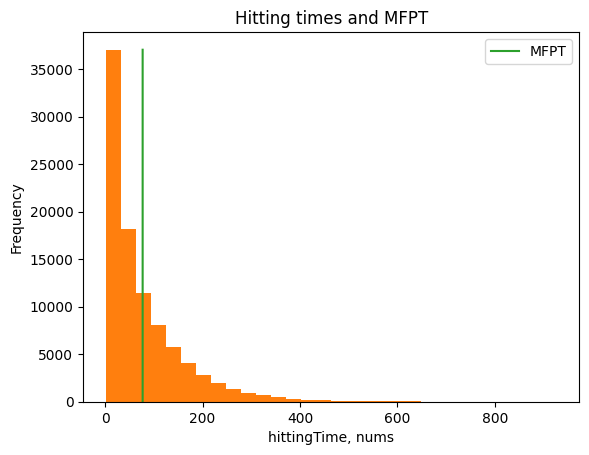

In [94]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()

plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

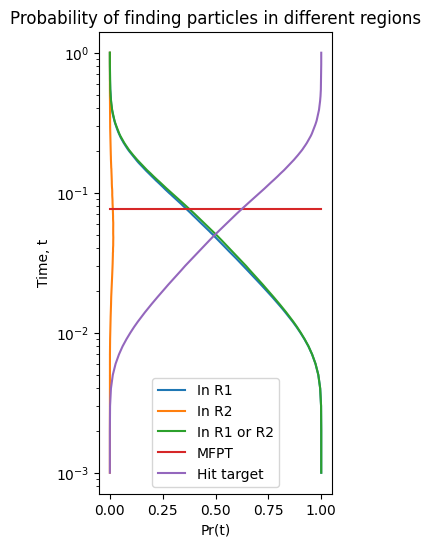

In [95]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")
plt.title("Probability of finding particles in different regions")
plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_{nump}_{nums}_{D1}_{D2}.png')
plt.show()

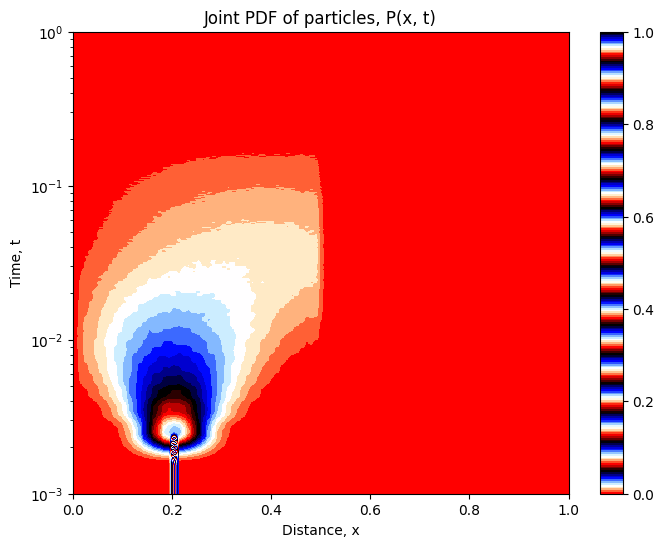

In [96]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'flag', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_flag.png')

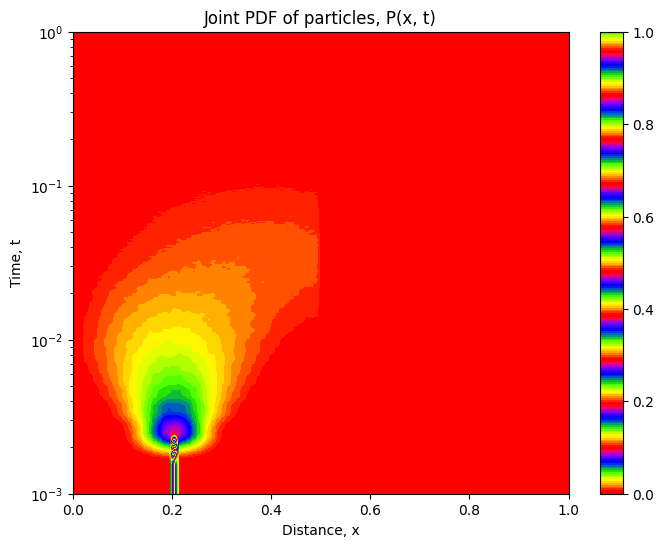

In [97]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'prism', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_{nump}_{nums}_{D1}_{D2}_prism.png')

#Miscelleneous

Mean First Passage Time =  76.87493353750611


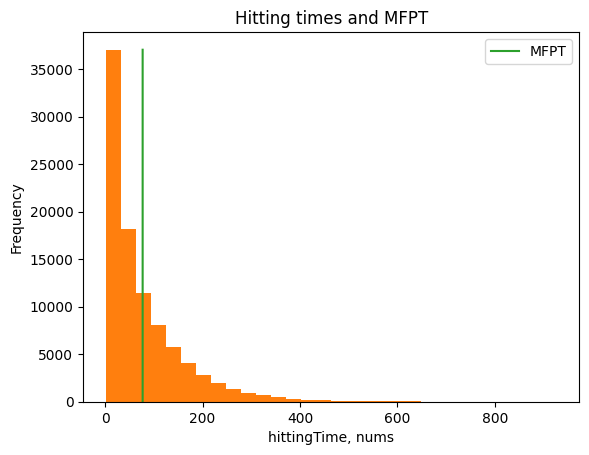

In [98]:
#Histogram hitting times and plot MFPT
hit = hittingTime[hittingTime != 0]
#hit = hittingTime
#Should zero be removed for MFPT calculation?
MFPT = np.average(hit)
print("Mean First Passage Time = ", MFPT)
plt.plot(np.tile(MFPT, int(max(plt.hist(hit, 30)[0]))), range(int(max(plt.hist(hit, 30)[0]))), label="MFPT")
#plt.hist(hit, 30, label="Zero removed")
#plt.hist(hittingTime, 30, label="Zero inflated")
plt.ylabel("Frequency")
plt.xlabel("hittingTime, nums")
plt.title("Hitting times and MFPT")
plt.legend()
plt.show()
#plt.savefig(f'/content/drive/MyDrive/Images/1D/Hist_Iso_10_1.png')

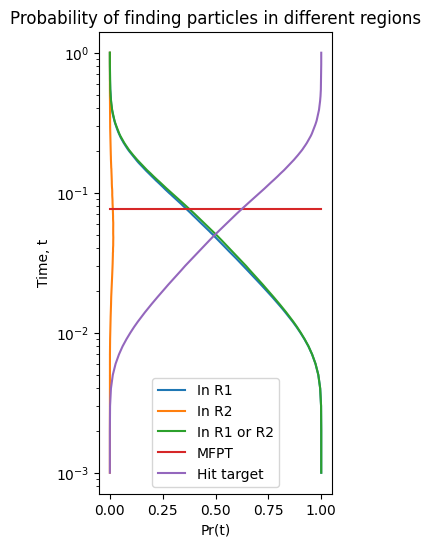

In [99]:
#Probability of finding a particle in medium1 or medium2 or hiting the target
count1 = np.zeros(nums)
count2 = np.zeros(nums)
count3 = np.zeros(nums)
for t in range(nums):
  count3[t] = np.count_nonzero((Y[t, :].flatten() < R))
  count1[t] = np.count_nonzero((R < Y[t, :].flatten()) & (Y[t, :].flatten() < R1))
  count2[t] = np.count_nonzero((R1 < Y[t, :].flatten()) & (Y[t, :].flatten() < R2))

plt.figure(figsize = (3, 6))
xticks = np.linspace(1/nums, 1, nums)
yticks = np.linspace(1/nums, 1, nums)
plt.yscale('log')
plt.plot(count1/nump, yticks)
plt.plot(count2/nump, yticks)
plt.plot((count1 + count2)/nump, yticks)
plt.plot(xticks, np.tile(MFPT/nums, nums))
plt.plot(count3/nump, yticks)
plt.legend(["In R1", "In R2", "In R1 or R2", "MFPT", "Hit target"])
plt.ylabel("Time, t")
plt.xlabel("Pr(t)")
plt.title("Likelihood in a region")
plt.title("Probability of finding particles in different regions")
#plt.savefig(f'/content/drive/MyDrive/Images/1D/Prob_Iso_10_1.png')
plt.show()

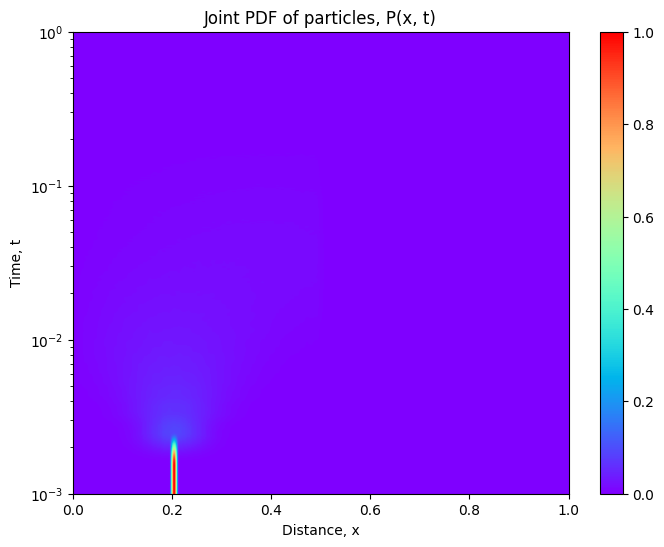

In [100]:
#Heatmap matrix for 1d
#Plotting parameters
gridX = 100
gridT = nums
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

#Quantize norm matrix Y for heatmap upto 2 decimal places
Z = np.round(Y/R2, 2)

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'rainbow', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_rainbow.png')

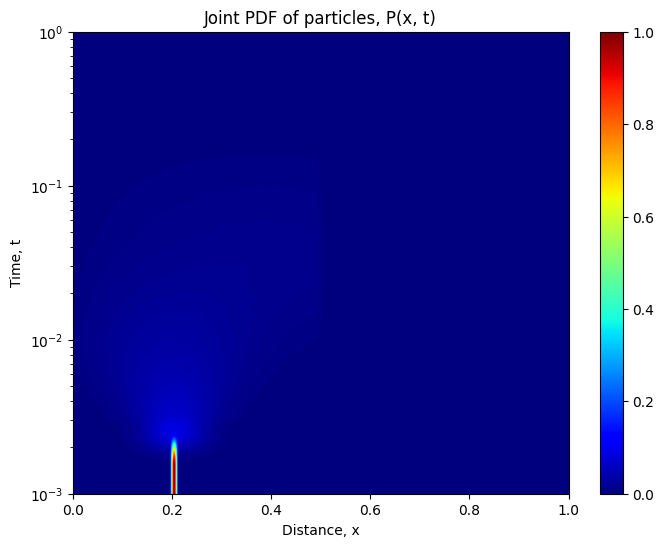

In [101]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'jet', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_jet.png')

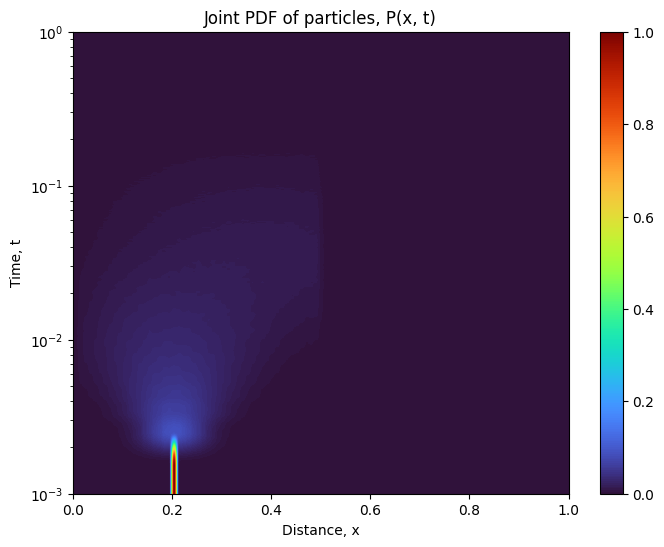

In [102]:
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
PDF1D = np.zeros((gridT, gridX+1))

for t in range(nums):
#position of all particles at time t
  for p in range(len(pos)):
    PDF1D[t][p] = np.count_nonzero(Z[t, :] == pos[p])

#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Joint PDF of particles, P(x, t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), cmap = 'turbo', extent = [0, 1, dt, dt*nums], aspect = "auto")
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_turbo.png')

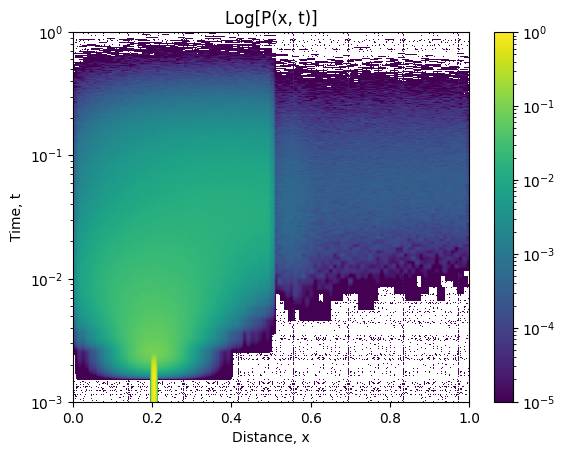

In [103]:
#Plot the heatmap of log of pdf
plt.title("Log[P(x, t)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(PDF1D/nump), extent = [0, 1, dt, dt*nums], aspect = "auto", norm='log')
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/Heat_Iso_10_1_Log.png')

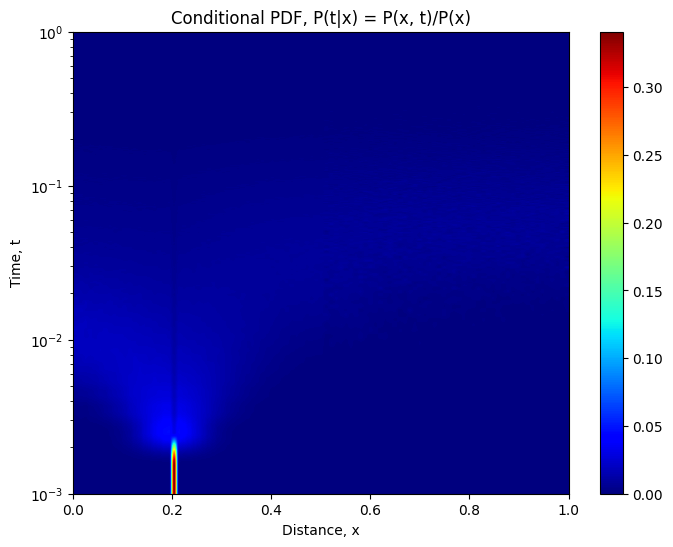

In [104]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(t|x) = P(x, t)/P(x)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[:, p])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'jet')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_jet.png')

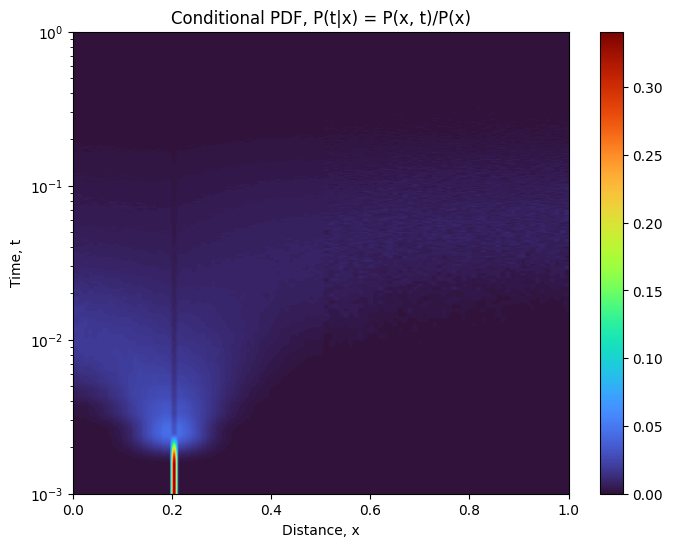

In [105]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'turbo')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_turbo.png')

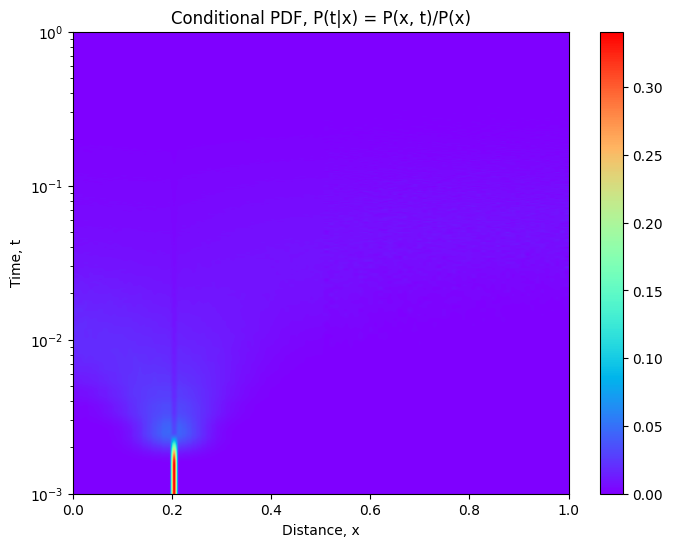

In [106]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(t|x) = P(x, t)/P(x)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap= 'rainbow')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_rainbow.png')

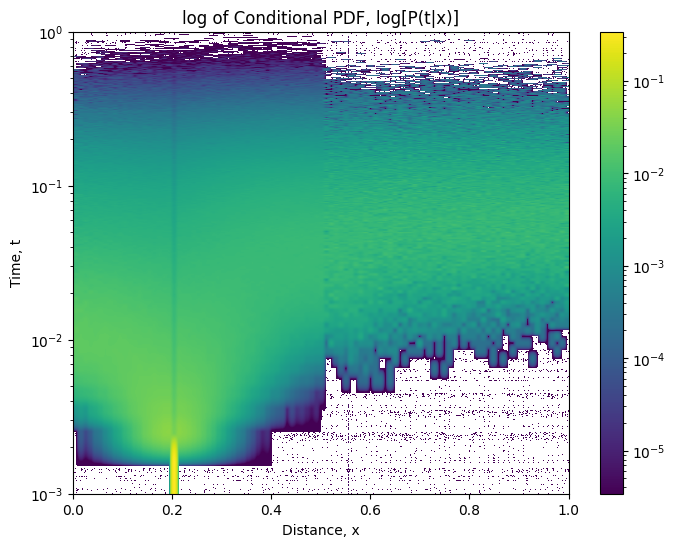

In [107]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(t|x) = P(x, t)/P(x)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[:, p])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("log of Conditional PDF, log[P(t|x)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", norm= 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CTX_Iso_10_1_log.png')

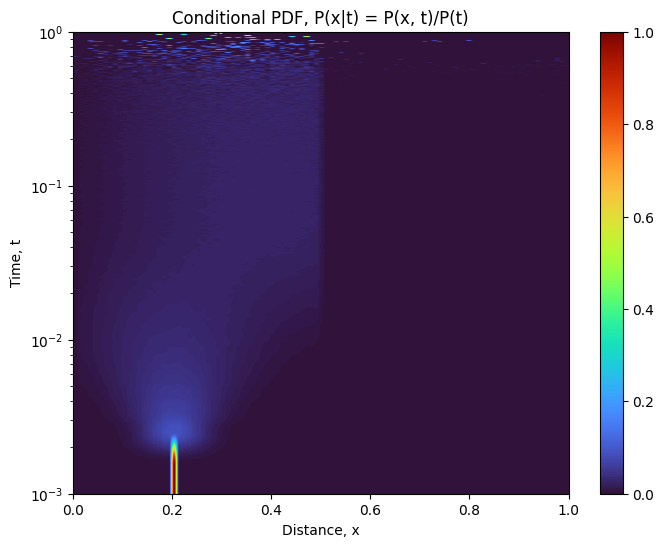

In [108]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(x|t) = P(x, t)/P(t)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'turbo')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_turbo.png')

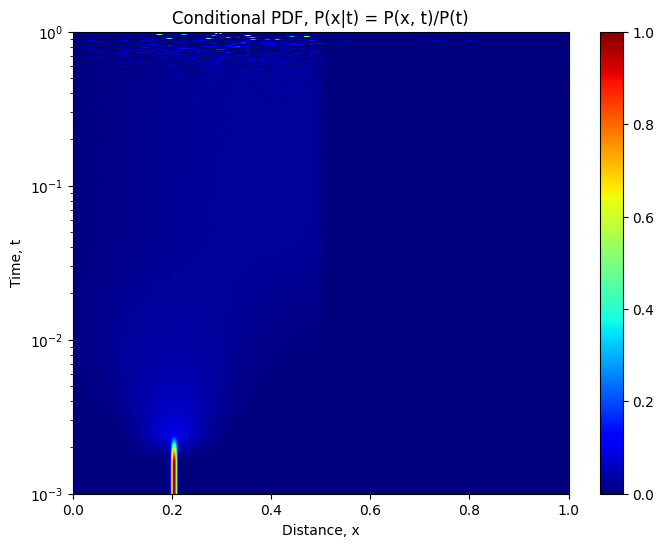

In [109]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'jet')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_jet.png')

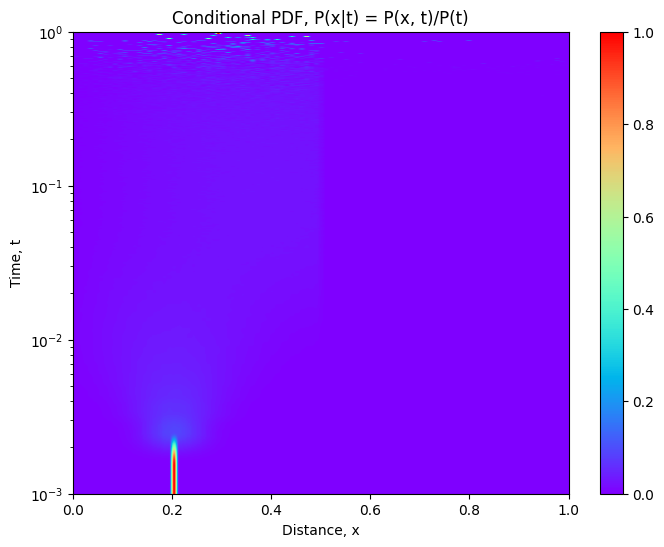

In [110]:
#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("Conditional PDF, P(x|t) = P(x, t)/P(t)")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'rainbow')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_rainbow.png')

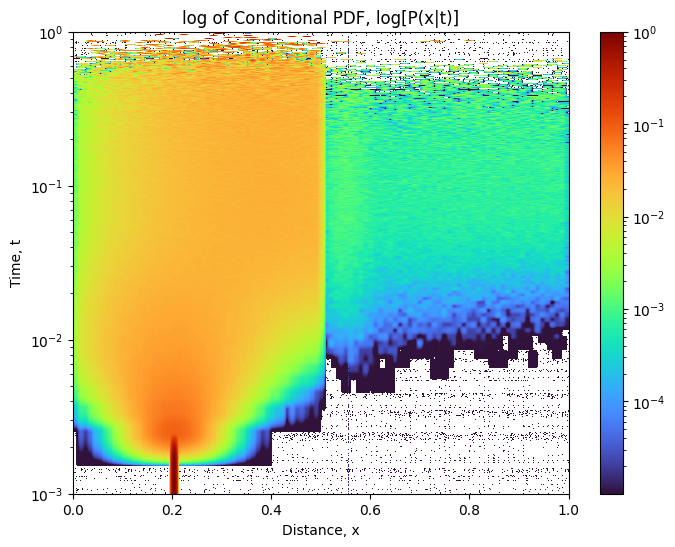

In [111]:
#Heatmap matrix for 1d
pos = np.round(np.linspace(0, 1, gridX + 1), 2)
tim = np.linspace(0, gridT, gridT+1)
condpdf = np.zeros((nums, len(pos)))

#Plot conditional density P(x|t) = P(x, t)/P(t)
for t in range(nums):
  for p in range(len(pos)):
    condpdf[t][p] = PDF1D[t][p]/np.sum(PDF1D[t, :])


#Plot the heatmap of pdf
plt.figure(figsize = (8, 6))
plt.title("log of Conditional PDF, log[P(x|t)]")
#PDF1D is a 2D matrix with (0,0)th element on top left. Fip vertically
plt.yscale('log')
plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'turbo', norm = 'log')
#plt.imshow(np.flipud(condpdf), extent = [0, 1, dt, dt*nums], aspect = "auto", cmap = 'gnuplot', norm = 'log')
#plt.imshow(np.flipud(PDF1D), extent = [0, 1, 0, 1], cmap= "gnuplot", aspect = "auto", norm="log", vmin=0.001, vmax=1000)
plt.xlabel("Distance, x")
plt.ylabel("Time, t")
plt.colorbar()
plt.savefig(f'/content/drive/MyDrive/Images/1D/CXT_Iso_10_1_log.png')

https://stackoverflow.com/questions/18266642/multiple-imshow-subplots-each-with-colorbar